In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


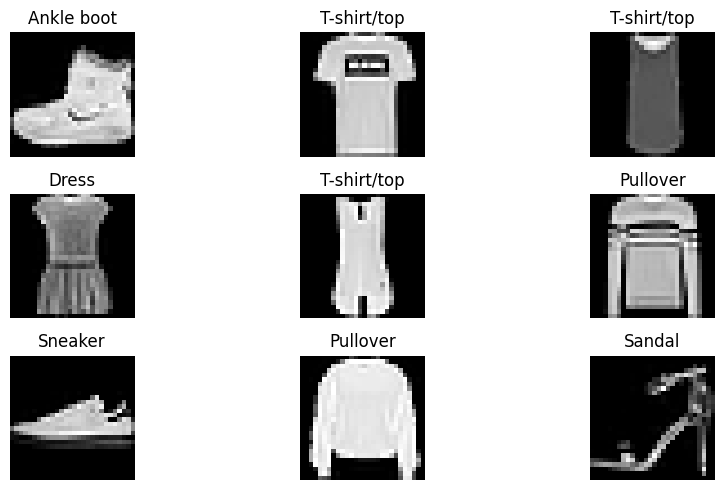

In [3]:
# Define class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot some images from the dataset
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_labels[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [4]:
# Normalize images to scale 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to include a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [5]:
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)


In [6]:
# Model Architecture
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Flatten and Fully Connected Layers
# MLP
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [8]:
# EarlyStopping is a callback function in Keras that stops training automatically when a monitored metric (e.g., validation loss) stops improving,
# preventing overfitting and reducing unnecessary computation.

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    validation_data=(x_test, y_test),
                    epochs=5,
                    callbacks=[early_stopping])


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 216ms/step - accuracy: 0.7420 - loss: 0.7001 - val_accuracy: 0.7476 - val_loss: 0.6504
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 213ms/step - accuracy: 0.8050 - loss: 0.5239 - val_accuracy: 0.8691 - val_loss: 0.3663
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.8310 - loss: 0.4566 - val_accuracy: 0.7931 - val_loss: 0.5862
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 199ms/step - accuracy: 0.8440 - loss: 0.4232 - val_accuracy: 0.8924 - val_loss: 0.2969
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.8535 - loss: 0.3990 - val_accuracy: 0.8842 - val_loss: 0.3169


In [10]:
# Test Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Evaluate on training data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc * 100:.2f}%")


Test Accuracy: 89.24%
Training Accuracy: 90.25%


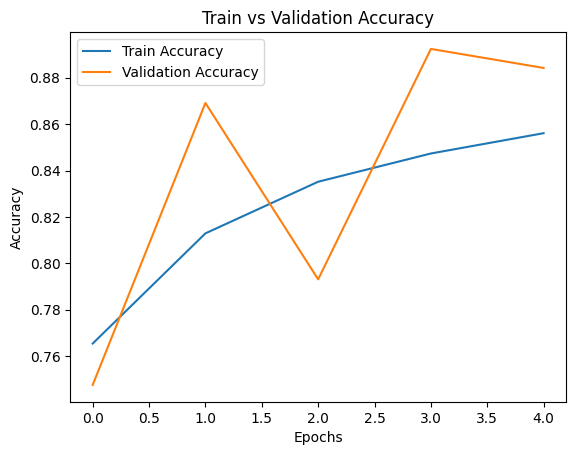

In [11]:
#Training Accuracy vs Validation Accuracy

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train vs Validation Accuracy")
plt.show()


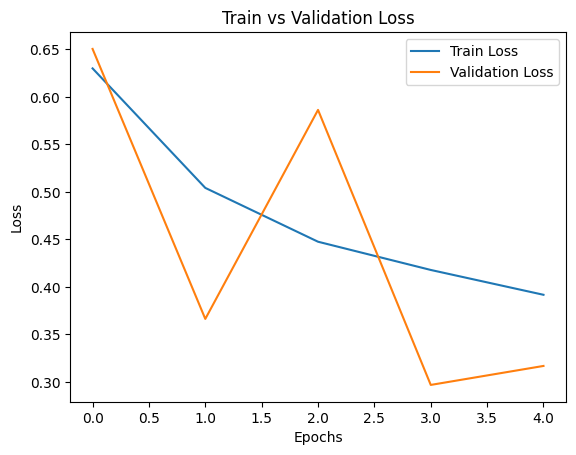

In [12]:
#Training Loss vs Validation Loss

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Train vs Validation Loss")
plt.show()


In [13]:
# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.84      0.85      0.84      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.83      0.78      0.80      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.70      0.69      0.69      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



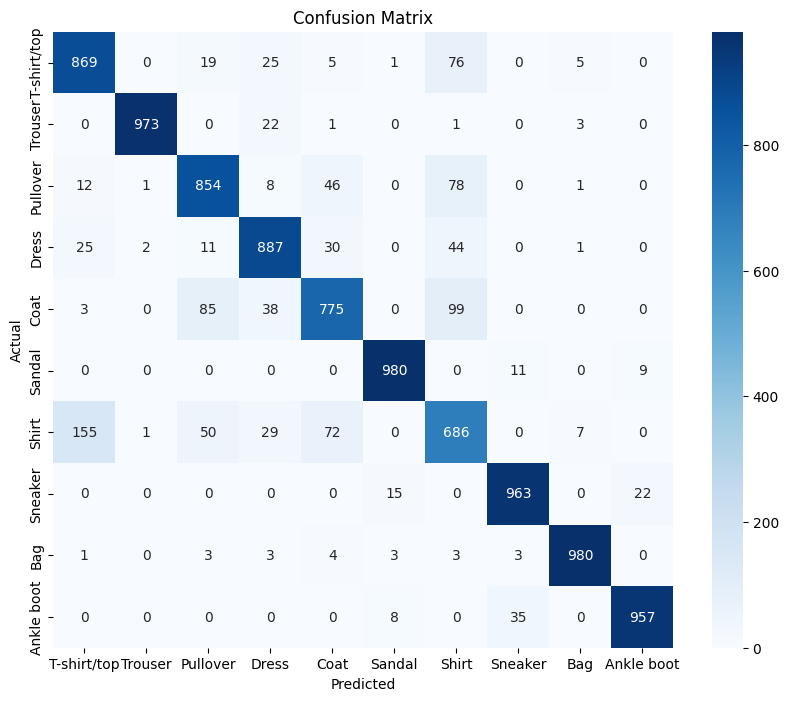

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Individual Accuracy

class_acc = cm.diagonal() / cm.sum(axis=1)
for label, acc in zip(class_labels, class_acc):
    print(f"Accuracy of {label}: {acc * 100:.2f}%")


Accuracy of T-shirt/top: 86.90%
Accuracy of Trouser: 97.30%
Accuracy of Pullover: 85.40%
Accuracy of Dress: 88.70%
Accuracy of Coat: 77.50%
Accuracy of Sandal: 98.00%
Accuracy of Shirt: 68.60%
Accuracy of Sneaker: 96.30%
Accuracy of Bag: 98.00%
Accuracy of Ankle boot: 95.70%
